<a href="https://colab.research.google.com/github/AhmedHeshamSakr/ML-Models-Comparison-and-Evaluation-/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All links:
Bayes:https://colab.research.google.com/drive/1_KLWftWD5hVW9BPBXZaDwNC4nvaYUA6J#scrollTo=-1AuBazpQhXk

KNN: https://colab.research.google.com/drive/1OFbn9iVfIGEptFE7vHnQLQ7_UaFtGIp4?usp=sharing

# Installations

In [ ]:
!pip install kaggle
!pip install seaborn
!pip install scikit-learn

# Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'


In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/kaggle/Titanic/train.csv')

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<ipython-input-6-2f428ec4661c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap="inferno")


<Axes: >

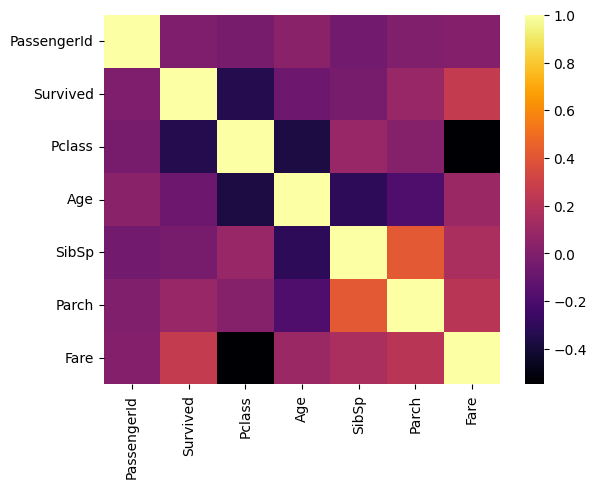

In [ ]:
sns.heatmap(titanic_data.corr(), cmap="inferno")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming titanic_data is your original DataFrame

# Define features and labels
features = titanic_data.drop('Survived', axis=1)
labels = titanic_data['Survived']

# Initialize StratifiedShuffleSplit for the first split (training and test)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_indices, test_indices in splitter.split(features, labels):
    train_set = titanic_data.loc[train_indices]
    test_set = titanic_data.loc[test_indices]

# Now, split the training set into training and validation
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_indices, valid_indices in splitter.split(train_set, train_set[["Survived", "Pclass", "Sex"]]):
    train_set = titanic_data.loc[train_indices]
    valid_set = titanic_data.loc[valid_indices]

# Now you have train_set, valid_set, and test_set

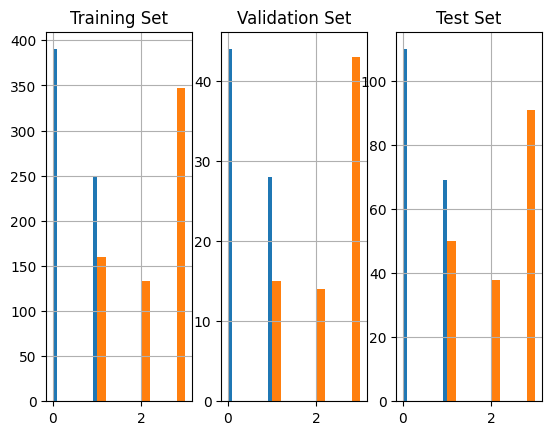

In [ ]:
plt.subplot(1, 3, 1)
train_set['Survived'].hist()
train_set['Pclass'].hist()
plt.title('Training Set')

plt.subplot(1, 3, 2)
valid_set['Survived'].hist()
valid_set['Pclass'].hist()
plt.title('Validation Set')

plt.subplot(1, 3, 3)
test_set['Survived'].hist()
test_set['Pclass'].hist()
plt.title('Test Set')

plt.show()

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 581 to 355
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  640 non-null    int64  
 1   Survived     640 non-null    int64  
 2   Pclass       640 non-null    int64  
 3   Name         640 non-null    object 
 4   Sex          640 non-null    object 
 5   Age          510 non-null    float64
 6   SibSp        640 non-null    int64  
 7   Parch        640 non-null    int64  
 8   Ticket       640 non-null    object 
 9   Fare         640 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     639 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 65.0+ KB


# Preprocessing

In [ ]:
class AgeImputer (BaseEstimator, TransformerMixin) :
    def fit (self, X, y=None) :
        return self

    def transform(self, X) :
        imputer = SimpleImputer (strategy="mean" )
        X['Age'] = imputer. fit_transform(X[['Age']])
        return X

In [ ]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # One-hot encode 'Embarked' column
        embarked_encoder = OneHotEncoder()
        embarked_matrix = embarked_encoder.fit_transform(X[['Embarked']]).toarray()
        embarked_column_names = ["C", "S", "Q", "N"]

        for i in range(len(embarked_matrix.T)):
            X[embarked_column_names[i]] = embarked_matrix.T[i]


        # One-hot encode 'Sex' column
        sex_encoder = OneHotEncoder()
        sex_matrix = sex_encoder.fit_transform(X[['Sex']]).toarray()
        sex_column_names = ["Female", "Male"]

        for i in range(len(sex_matrix.T)):
            X[sex_column_names[i]] = sex_matrix.T[i]


        return X

In [ ]:
class FeatureDropper (BaseEstimator, TransformerMixin) :
    def fit (self, X, Y=None) :
        return self
    def transform (self, X) :
        return X.drop (["Embarked", "Name", "Ticket", "Cabin", "PassengerId","Sex","N"], axis=1 , errors="ignore" )

In [ ]:
from sklearn.compose import ColumnTransformer
# Your pipeline
preprocessing_pipeline = Pipeline([
    ("AgeImputer", AgeImputer()),
    ("FeatureEncoder", FeatureEncoder()),
    ("FeatureDropper", FeatureDropper()),
    ("Scaler", StandardScaler())
])

# Data Splitting

In [ ]:
X_train_processed = preprocessing_pipeline.fit_transform(train_set)

# Transform the validation and test sets using the same transformer
X_valid_processed = preprocessing_pipeline.transform(valid_set)
X_test_processed = preprocessing_pipeline.transform(test_set)


In [ ]:
# Assuming you have already defined the train_set, valid_set, and test_set

# Separate features and labels in the training set
X_train = train_set.drop(['Survived'], axis=1)
y_train = train_set['Survived']
y_train_data = y_train.to_numpy()

# Separate features and labels in the validation set
X_valid = valid_set.drop(['Survived'], axis=1)
y_valid = valid_set['Survived']
y_valid_data = y_valid.to_numpy()

# Separate features and labels in the test set
X_test = test_set.drop(['Survived'], axis=1)
y_test = test_set['Survived']
y_test_data = y_test.to_numpy()

# Fit and transform the training set with the preprocessing pipeline
X_train_data = preprocessing_pipeline.fit_transform(X_train)
# Transform the validation and test sets using the fitted pipeline
X_valid_data = preprocessing_pipeline.transform(X_valid)
X_test_data = preprocessing_pipeline.transform(X_test)



# **Support Vector Machine Model**










# SKlearn model

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train_data,y_train_data)
predections=model.predict(X_valid_data)
accuracy1 = model.score(X_valid_data,y_valid_data)
accuracy = model.score(X_test_data,y_test_data)

print(accuracy)
accuracy1

0.8156424581005587


0.8194444444444444

# Model from scratch

In [ ]:
class SVM_classifier():



  def __init__(self, learning_rate = 0.001, no_of_iterations = 1000, lambda_parameter = 0.01):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter




  def fit(self, X, Y):

    # m  number of rows
    # n  number of columns
    self.m, self.n = X.shape



    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y



    for i in range(self.no_of_iterations):
      self.update_weights()




  def update_weights(self):


    y_label = np.where(self.Y <= 0, -1, 1)




    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db




  def predict(self, X):

    output = np.dot(X, self.w) - self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat


  def decision_function(self, X):
        return np.dot(X, self.w) - self.b

  def predict_proba(self, X):
        decision_function_values = self.decision_function(X)
        # Using the logistic function to convert decision function values to probabilities
        probabilities = 1 / (1 + np.exp(-decision_function_values))
        return np.column_stack((1 - probabilities, probabilities))

In [ ]:
if __name__ == "__main__":
    svm = SVM_classifier(0.001,1000,10)
    svm.fit(X_train_data,y_train_data)
    # Training accuracy
    pre = svm.predict(X_train_data)
    accuracy_train = np.sum(pre == y_train_data.astype(np.float64)) / len(y_train_data)
    print("Training Accuracy:", accuracy_train)

    # Validation accuracy
    pre1 = svm.predict(X_valid_data)
    accuracy_valid = np.sum(pre1 == y_valid_data.astype(np.float64)) / len(y_valid_data)
    print("Validation Accuracy:", accuracy_valid)

    # Testing accuracy
    pre2 = svm.predict(X_test_data)
    accuracy_test = np.sum(pre2 == y_test_data.astype(np.float64)) / len(y_test_data)
    print("Testing Accuracy:", accuracy_test)


Training Accuracy: 0.609375
Validation Accuracy: 0.6111111111111112
Testing Accuracy: 0.6145251396648045


# **Evaluation Metrics**

# Validation metrics

In [ ]:
print("Shapes:", y_valid_data.shape, len(pre1))
# Evaluate the model on the validation set
accuracy = accuracy_score(y_valid_data, pre1)
print(f'Accuracy on the validation set: {accuracy:.2f}')
# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_valid_data, pre1))
print("\nClassification Report:")
print(classification_report(y_valid_data, pre1))

Shapes: (72,) 72
Accuracy on the validation set: 0.82
Confusion Matrix:
[[40  4]
 [ 9 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        44
           1       0.83      0.68      0.75        28

    accuracy                           0.82        72
   macro avg       0.82      0.79      0.80        72
weighted avg       0.82      0.82      0.82        72



# Testing metrics

In [ ]:
print("Shapes:", y_test_data.shape, len(pre2))
# Evaluate the model on the Testing set
accuracy = accuracy_score(y_test_data, pre2)
print(f'Accuracy on the testing set: {accuracy:.2f}')
# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_data, pre2))
print("\nClassification Report:")
print(classification_report(y_test_data, pre2))

Shapes: (179,) 179
Accuracy on the testing set: 0.82
Confusion Matrix:
[[96 14]
 [19 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



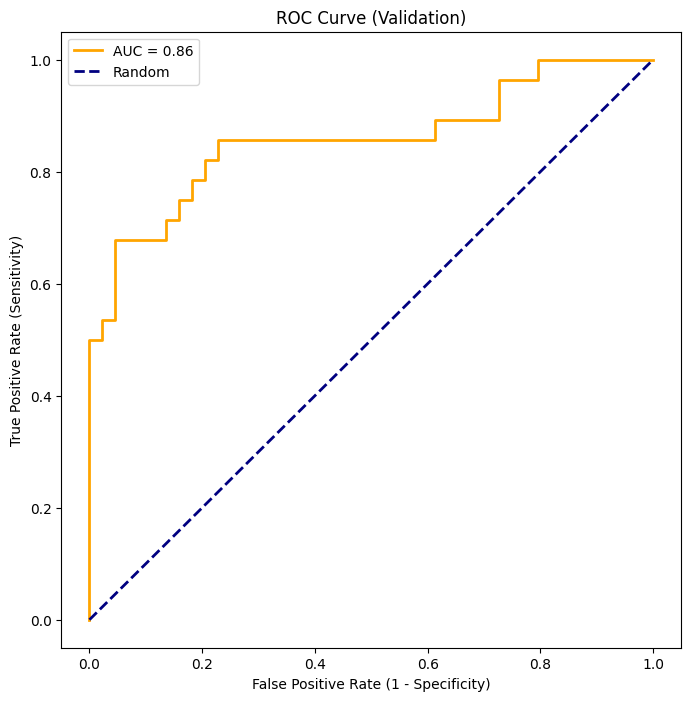

In [ ]:
if __name__ == "__main__":

    svm = SVM_classifier()
    svm.fit(X_train_data.astype(np.float64), y_train_data.astype(np.float64))

    # Get predicted probabilities for the positive class (class 1)
    y_valid_probs = svm.predict_proba(X_valid_data)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_valid_data, y_valid_probs)
    auc = roc_auc_score(y_valid_data, y_valid_probs)

    # Plot ROC Curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve (Validation)')
    plt.legend()
    plt.show()

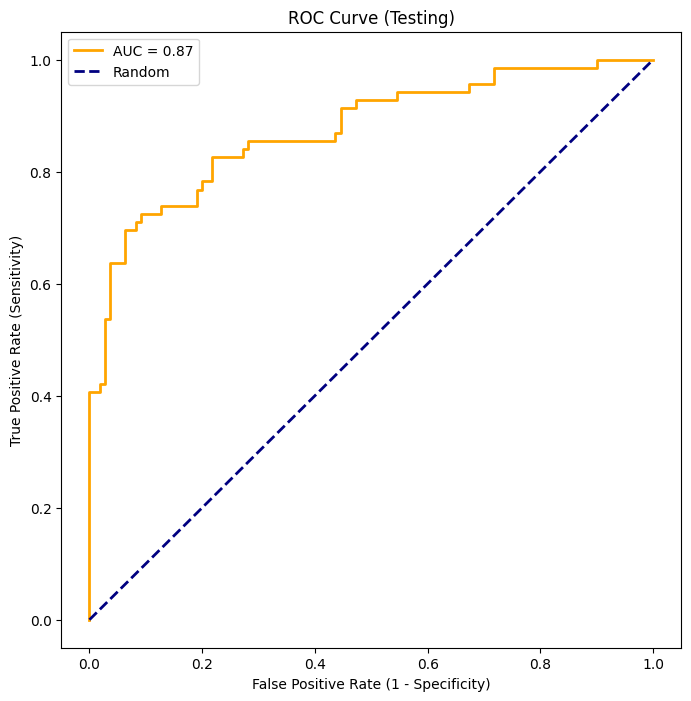

In [ ]:
if __name__ == "__main__":

    svm = SVM_classifier()
    svm.fit(X_train_data.astype(np.float64), y_train_data.astype(np.float64))

    # Get predicted probabilities for the positive class (class 1)
    y_test_probs = svm.predict_proba(X_test_data)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_data, y_test_probs)
    auc = roc_auc_score(y_test_data, y_test_probs)

    # Plot ROC Curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve (Testing)')
    plt.legend()
    plt.show()